# Homework 01
## Submission Instructions:
1. Once the notebook is completed, **RESTART THE KERNEL AND RUN ALL CELLS**, save it and submit it. 
2. DO NOT submit the data from the assignment.
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.

In [134]:
import re
from pathlib import Path
import json
import pandas as pd
import os

1. For this first assignment we will be parsing job postings from ZipRecruiter.  In the homework data data.zip, there are 2 folders:

- search_results: This contains a folder for each search I did.  The folder is named f'search-{query}_location-{location}'.  Each file in those folders contains a page of the search results.  Most of these searches returned 1000+ results and so they should have 50 pages.
- jobs: This contains all the job postings.  The name of each file is the jid (job ID) and is (I think) unique.

For this first question, read in all the search results and extract the form_search, form_location and page_number as well as all the rawCanonicalZipJobPageUrls for each job

In [135]:

base_path = Path("data/search_results")
rows = []

pat_dir  = re.compile(r"^search-(?P<query>.+)_location-(?P<location>.+)$")
pat_page = re.compile(r"^page_(?P<page_num>\d+)$")

for directory in base_path.iterdir():
    if not directory.is_dir():
        continue 

    m = pat_dir.match(directory.name)
    if not m:  
        continue 

    form_search   = m.group("query")
    form_location = m.group("location")

    for file_path in directory.iterdir():
        if not file_path.is_file() or file_path.suffix.lower() != ".json":
            continue  

        pm = pat_page.match(file_path.stem)
        if not pm:
            continue 

        page_number = int(pm.group("page_num"))

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

        job_cards = data.get("hydrateJobCardsResponse", {}).get("jobCards", [])
        for card in job_cards:
            url = card.get("rawCanonicalZipJobPageUrl")
            if url: 
                rows.append({
                    "search": form_search,
                    "location": form_location,
                    "page_number": page_number,
                    "job_link": url
                })

df = pd.DataFrame(rows)
df

,search,location,page_number,job_link
0,ai_ml_engineer,United_States,1,/c/datanet-IT/Job/AI-ML-Engineer-(Prompt-Engin...
1,ai_ml_engineer,United_States,1,/c/Amicis-Global/Job/AI-ML-Engineer-Data-Scien...
2,ai_ml_engineer,United_States,1,/c/Optimum/Job/Software-Dev-Engineer-III/-in-B...
3,ai_ml_engineer,United_States,1,/c/University-of-Hawaii/Job/(Casual-Hire)-AI-M...
4,ai_ml_engineer,United_States,1,/c/Discover/Job/Principal-Cybersecurity-Engine...
...,...,...,...,...
9814,nlp_engineer,United_States,50,"/c/Total-System-Services/Job/Manager,-AI-Engin..."
9815,nlp_engineer,United_States,50,"/c/Castandcrew/Job/Director,-Software-Engineer..."
9816,nlp_engineer,United_States,50,/c/F.-Hoffmann-La-Roche-Ltd/Job/Data-Scientist...
9817,nlp_engineer,United_States,50,"/c/BNY/Job/Vice-President,-Model-Risk-for-AI/-..."


2. Create a function, **using a regex**, to return the jid from each of the rawCanonicalZipJobPageUrls

In [136]:
df['jid'] = df['job_link'].str.extract(r'jid=(.*)')

3. Create a data frame from the search results you extracted above and extract the jid using your function above.  Display the .head() of the data frame.  Use the column names as below

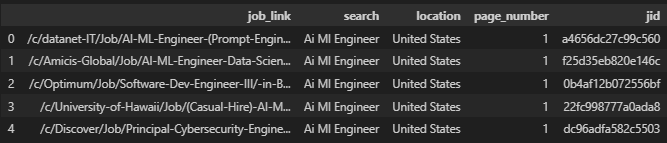

In [137]:
df.head()

,search,location,page_number,job_link,jid
0,ai_ml_engineer,United_States,1,/c/datanet-IT/Job/AI-ML-Engineer-(Prompt-Engin...,a4656dc27c99c560
1,ai_ml_engineer,United_States,1,/c/Amicis-Global/Job/AI-ML-Engineer-Data-Scien...,f25d35eb820e146c
2,ai_ml_engineer,United_States,1,/c/Optimum/Job/Software-Dev-Engineer-III/-in-B...,0b4af12b072556bf
3,ai_ml_engineer,United_States,1,/c/University-of-Hawaii/Job/(Casual-Hire)-AI-M...,22fc998777a0ada8
4,ai_ml_engineer,United_States,1,/c/Discover/Job/Principal-Cybersecurity-Engine...,dc96adfa582c5503


4. Group by jid and count the job_links to see if there are any duplicate job ids.  Sort by the total count and .head() the results.

In [138]:
df.groupby('jid')['job_link'].count().sort_values(ascending=False).head()

jid
29c3eb1678e94634    6
fc816da3e229409e    6
509a0f5b5f722bc4    5
a775bdef89298c61    5
948ed868b8761754    5
Name: job_link, dtype: int64

5. Select 1 of the most frequent job postings and print the resulting data frame.

In [139]:
job_counts = df.groupby('jid')['job_link'].count()
max_value=job_counts.idxmax()
max_value_df = df[df['jid'] == max_value]
max_value_df.head()

,search,location,page_number,job_link,jid
396,ai_ml_engineer,United_States,21,"/c/Cast-and-Crew-LLC/Job/Director,-Software-En...",29c3eb1678e94634
965,ai_ml_engineer,United_States,50,"/c/Castandcrew/Job/Director,-Software-Engineer...",29c3eb1678e94634
8468,MLOps_Engineer,United_States,31,"/c/Cast-and-Crew-LLC/Job/Director,-Software-En...",29c3eb1678e94634
8830,MLOps_Engineer,United_States,50,"/c/Castandcrew/Job/Director,-Software-Engineer...",29c3eb1678e94634
9644,nlp_engineer,United_States,42,"/c/Cast-and-Crew-LLC/Job/Director,-Software-En...",29c3eb1678e94634


6. Why is it duplicate?  Are there different job links for the same jid?  Can we assume jid is unique?  Do some investigating and ascertain if jid is actually the way to uniquely describe a job posting.  Use a print statement to display your answer.

In [140]:
print('Certain jobs like ai_ml_engineer and MLOps_Engineer appeared in multiple searches, \nmaybe beacuse the job descriptions are overlaping and there are NO different job links for the same jobid\n. With that the JobID can be assumed as unique and i assume that this can be used to describe a certain job posting. ')

Certain jobs like ai_ml_engineer and MLOps_Engineer appeared in multiple searches, 
maybe beacuse the job descriptions are overlaping and there are NO different job links for the same jobid
. With that the JobID can be assumed as unique and i assume that this can be used to describe a certain job posting. 


7. Create a new table by jid.  Select only the search queries and the jid and then groupby the jid and aggregate the search terms into a list.  `.head()` the results

In [141]:
table=df[['jid','search']].groupby('jid')
search_terms_aggregate=table['search'].agg(list)
search_terms_aggregate.head(10)

jid
0009bc980684a44b                  [Data_Architect]
000dcc0b4db30c58                  [ai_ml_engineer]
001045e90d901843                [Business_Analyst]
0012b8f4bdf93d97                  [MLOps_Engineer]
0018a96cd42d3175                [Business_Analyst]
001b8c4e8912a539                [Business_Analyst]
001d943235f51b4d                  [Data_Scientist]
001e15b8bef68c42                  [Data_Scientist]
003b0abc4d2d2502       [Machine_Learning_Engineer]
003e567d3fefdc6e    [ai_ml_engineer, nlp_engineer]
Name: search, dtype: object

8. Load your job assignments.  The job assignments are in job_assignments_sampled.json.  Your files are under your email.

In [142]:
with open("job_assignments_sampled.json", "r", encoding="utf-8") as l:
    job_assignments_sampled_file = json.load(l)

jobs = job_assignments_sampled_file.get("mudzimtb@clarkson.edu", {}).get("jobs", [])

if jobs:
    print("True")
else:
    print("False (no jobs found)")


True


9. Loop through these job files and get the job description, company description and salary

In [143]:
job_list=[]
for job in jobs:
    with open(f"data/jobs/{job}", "r", encoding="utf-8") as m:
        each_job = json.load(m)
        job_description = each_job.get("jobDetails", {}).get("Description", {})
        company_description=each_job.get("companyWidgetProp",{}).get("Description",{}).get("CompanyDescription",{})
        salary=each_job.get("jobDetails",{}).get("Salary",{})
    job_list_dictionary={"job_description": job_description,"company_description": company_description,"salary": salary,"jid":job.rstrip(".json")}
    job_list.append(job_list_dictionary)

job_list_df=pd.DataFrame(job_list)


10. Create a pandas data frame from the results, sort descending by the description length.  .head() the results.  The head of my data frame is below:

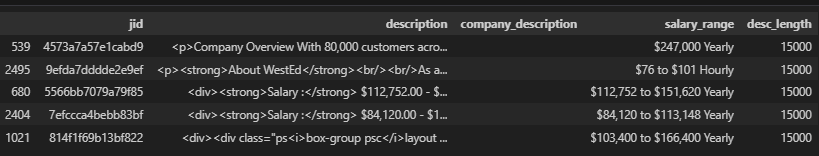

In [144]:
job_list_df['desc_length'] = job_list_df['job_description'].astype(str).str.len()
job_list_df = job_list_df.sort_values(by='desc_length', ascending=False)
job_list_df.head()


,job_description,company_description,salary,jid,desc_length
2547,"<p><b>Work Location:</b></p>Mount Laurel, New ...",,"$68,640 to $112,320 Yearly",65b91ccbba4447c7,15000
845,"<p>DUTIES ANNUAL SALARY: $121,813 to $178,085 ...",,"$121,813 to $178,085 Yearly",1ca8b1c8c73522b8,15000
1046,<div><div><p><b>Title:</b> Managing Consultan...,,$72 to $93 Hourly,cbcca19ab70f64f8,15000
2092,"<p>Company Overview With 80,000 customers acro...",,"$247,000 Yearly",4573a7a57e1cabd9,15000
2197,<div> <div> Job Details </div> <div> <div> ...,,"$90,000 to $95,000 Yearly",00ba1033c6623680,15000


11. Merge your job data with your data frame from question 7.  Use a left join

In [145]:
merged=pd.merge(job_list_df,search_terms_aggregate,on="jid", how="left")
merged.head()

,job_description,company_description,salary,jid,desc_length,search
0,"<p><b>Work Location:</b></p>Mount Laurel, New ...",,"$68,640 to $112,320 Yearly",65b91ccbba4447c7,15000,"[Business_Analyst, Business_Analyst]"
1,"<p>DUTIES ANNUAL SALARY: $121,813 to $178,085 ...",,"$121,813 to $178,085 Yearly",1ca8b1c8c73522b8,15000,"[Data_Architect, Data_Architect]"
2,<div><div><p><b>Title:</b> Managing Consultan...,,$72 to $93 Hourly,cbcca19ab70f64f8,15000,[Data_Architect]
3,"<p>Company Overview With 80,000 customers acro...",,"$247,000 Yearly",4573a7a57e1cabd9,15000,[ai_ml_engineer]
4,<div> <div> Job Details </div> <div> <div> ...,,"$90,000 to $95,000 Yearly",00ba1033c6623680,15000,[Computer_Vision_Engineer]


12. Are there any jobs without a search query value?  Display the number of rows where the search is null

In [146]:
print(merged["search"].isna().sum())


116


13. Acronyms add complexity to reading a document because they require you to understand what the acronym stands for.  Create a regex to capture all sequences of 3-4 capital letters separated by word boundaries and apply that to the text.  Add those acronyms as a column called 'acronyms'.  .head() your data frame.

In [147]:
merged["acronyms"] = merged["job_description"].str.findall(r'\b[A-Z]{3,4}\b')
merged.head(5)

,job_description,company_description,salary,jid,desc_length,search,acronyms
0,"<p><b>Work Location:</b></p>Mount Laurel, New ...",,"$68,640 to $112,320 Yearly",65b91ccbba4447c7,15000,"[Business_Analyst, Business_Analyst]","[USD, TSYS, WBS, RFI, RFP, ADA, PTO, PTO, PTO]"
1,"<p>DUTIES ANNUAL SALARY: $121,813 to $178,085 ...",,"$121,813 to $178,085 Yearly",1ca8b1c8c73522b8,15000,"[Data_Architect, Data_Architect]","[SQL, AND, ONE, THE, SQL, SQL, DBA, OCP, IBM, ..."
2,<div><div><p><b>Title:</b> Managing Consultan...,,$72 to $93 Hourly,cbcca19ab70f64f8,15000,[Data_Architect],"[FLSA, AWS, EHR, PMP, CSM, PMI, ACP, EMR, SQL,..."
3,"<p>Company Overview With 80,000 customers acro...",,"$247,000 Yearly",4573a7a57e1cabd9,15000,[ai_ml_engineer],"[UKG, UKG, UKG, UKG, RAG, AWS, UKG, UKG, UKG, ..."
4,<div> <div> Job Details </div> <div> <div> ...,,"$90,000 to $95,000 Yearly",00ba1033c6623680,15000,[Computer_Vision_Engineer],"[LLC, CRM, NET, SQL]"


14. Count and display the top 10 most common acronyms.  Do these acronyms make sense?  What type of skills do you see in your top 10 acronyms?

In [148]:
exploded_acronyms = merged["acronyms"].explode()
top_10_acronyms = exploded_acronyms.value_counts().head(10)
top_10_acronyms

acronyms
SQL    2104
AWS    1784
ETL     811
NLP     729
GCP     544
LLM     540
PTO     393
EEO     347
API     331
RAG     296
Name: count, dtype: int64

In [149]:
print(f'Most common Acronym referenced: {top_10_acronyms.index[0]}')
print(' and they kinda make sense especially in the context of job postings\n and there are \n techinical data skills like SQL, ETL, API \n Cloud Skills like AWS, GCP\n AI/ML Skills like NLP, LLM, RAG and Non-technical Acronyms like PTO, EEO.')

Most common Acronym referenced: SQL
 and they kinda make sense especially in the context of job postings
 and there are 
 techinical data skills like SQL, ETL, API 
 Cloud Skills like AWS, GCP
 AI/ML Skills like NLP, LLM, RAG and Non-technical Acronyms like PTO, EEO.


15. 

Develop a regex to capture any dates that may appear in the documents.

Create at least 4 regexes

- To capture dates in the format January 31, 2024.  Should capture with and without a day.  So January 31, 2024 and January 2024
- To capture dates in the format Jan 31, 2024.  Should capture with and without a day.  So Jan 31, 2024 and Jan 2024. Some month abbreviations have a period after the abbreviation, some don't
- To capture dates like 10/10/2025 or 10.10.2025
- To capture dates like 2025-08-09

For each regex, create three capture groups.  One for the month, one for the day, and one for the year.
There may be more, but these should cover the basics

In [150]:


# 1) "January 31, 2024" or "January 2024"
rx_full = re.compile(
    r"\b(?P<month>January|February|March|April|May|June|July|August|September|October|November|December)"
    r"(?:\s+(?P<day>0?[1-9]|[12][0-9]|3[01])(?:st|nd|rd|th)?\s*,?)?"
    r"\s+(?P<year>\d{4})\b",
    re.IGNORECASE
)

# 2) "Jan 31, 2024" or "Jan. 2024" 
rx_abbr = re.compile(
    r"\b(?P<month>Jan\.?|Feb\.?|Mar\.?|Apr\.?|May|Jun\.?|Jul\.?|Aug\.?|Sep\.?|Sept\.?|Oct\.?|Nov\.?|Dec\.?)"
    r"(?:\s+(?P<day>0?[1-9]|[12][0-9]|3[01])(?:st|nd|rd|th)?\s*,?)?"
    r"\s+(?P<year>\d{4})\b",
    re.IGNORECASE
)

# 3) "10/10/2025" or "10.10.2025"  (MM/DD/YYYY)
rx_numeric = re.compile(
    r"\b(?P<month>0?[1-9]|1[0-2])[./](?P<day>0?[1-9]|[12][0-9]|3[01])[./](?P<year>\d{4})\b"
)

# 4) "2025-08-09" (YYYY-MM-DD)
rx_iso = re.compile(
    r"\b(?P<year>\d{4})-(?P<month>0[1-9]|1[0-2])-(?P<day>0[1-9]|[12][0-9]|3[01])\b"
)


In [151]:
text = "January 31, 2024; January 2024; Jan. 5, 2025; Jan 2025; 10/10/2025; 10.10.2025; 2025-08-09"
for m in rx_full.finditer(text):   print("FULL  ", m.group("month"), m.group("day") or "1", m.group("year"))
for m in rx_abbr.finditer(text):   print("ABBR  ", m.group("month"), m.group("day") or "1", m.group("year"))
for m in rx_numeric.finditer(text):print("NUM   ", m.group("month"), m.group("day"), m.group("year"))
for m in rx_iso.finditer(text):    print("ISO   ", m.group("month"), m.group("day"), m.group("year"))


FULL   January 31 2024
FULL   January 1 2024
ABBR   Jan. 5 2025
ABBR   Jan 1 2025
NUM    10 10 2025
NUM    10 10 2025
ISO    08 09 2025


16. Apply the date regexes to your description and store the results in three columns (`date_matches_01`, `date_matches_02`, etc.).  `.head()` the results

In [152]:
 
def extract_matches(text, regex):
    if not isinstance(text, str):
        return ""
    return "; ".join(m.group(0) for m in regex.finditer(text))

merged["date_matches_01"] = merged["job_description"].apply(lambda x: extract_matches(x, rx_full))
merged["date_matches_02"] = merged["job_description"].apply(lambda x: extract_matches(x, rx_abbr))
merged["date_matches_03"] = merged["job_description"].apply(lambda x: extract_matches(x, rx_numeric))
merged["date_matches_04"] = merged["job_description"].apply(lambda x: extract_matches(x, rx_iso))

merged[["job_description","date_matches_01","date_matches_02","date_matches_03","date_matches_04"]].head(20)


,job_description,date_matches_01,date_matches_02,date_matches_03,date_matches_04
0,"<p><b>Work Location:</b></p>Mount Laurel, New ...",,,,
1,"<p>DUTIES ANNUAL SALARY: $121,813 to $178,085 ...","September 5, 2025; September 18, 2025; SEPTEMB...",,,
2,<div><div><p><b>Title:</b> Managing Consultan...,,,,
3,"<p>Company Overview With 80,000 customers acro...",,,,
4,<div> <div> Job Details </div> <div> <div> ...,,,,
5,"<div><div class=""ps<i>box-group psc</i>layout ...",,,,
6,"<div><strong>Salary:</strong> $86,912.00 - $11...",,,08/11/2025; 8/25/2025,
7,<p>Position/Program Information EXAM NUMBER: P...,"July 17, 2025",,,
8,<strong> </strong><strong>POSITION SUMMARY</st...,,,,
9,<div><b> Job Details </b><br><br><strong>Worki...,"July 1, 2009; August 1, 2012",,08/12/2025; 08/21/2025,


17. Check all descriptions for the year 2025 and see which jobs have 2025 in the description but have no dates found.  .head() the results.

In [153]:

mask_year = merged["job_description"].str.contains(r"2025", na=False)

mask_no_dates = (
    (merged["date_matches_01"] == "") &
    (merged["date_matches_02"] == "") &
    (merged["date_matches_03"] == "") &
    (merged["date_matches_04"] == "")
)

merged_2025_no_dates = merged[mask_year & mask_no_dates]

merged_2025_no_dates[["job_description","date_matches_01", "date_matches_02", "date_matches_03","date_matches_04"]].head()


,job_description,date_matches_01,date_matches_02,date_matches_03,date_matches_04
10,Job Description:\n\nAbout the Northwest Portla...,,,,
60,<div> <div> <div> <b>ABOUT ARTERA</b> </di...,,,,
97,<div><p><b>Discover. A brighter future.</b></p...,,,,
180,<p>Description</p><p><strong>Join our winning ...,,,,
188,"<h3>Job Description</h3><div><b>Lead, Build, a...",,,,


18. Inspect some of these job descriptions and give an example of a date that you missed and explain why your regexes above missed that date

In [154]:
print(merged_2025_no_dates["job_description"].iloc[2])

<div><p><b>Discover. A brighter future.</b></p><p>With us, you’ll do meaningful work from Day 1. Our collaborative culture is built on three core behaviors: We Play to Win, We Get Better Every Day &amp; We Succeed Together. And we mean it — we want you to grow and make a difference at one of the world's leading digital banking and payments companies. We value what makes you unique so that you have an opportunity to shine. </p><p></p><p>Come build your future, while being the reason millions of people find a brighter financial future with Discover.</p><p></p><b>Job Description:</b><p><b>What You’ll Do</b></p><p></p><p>Responsibility of the role is to design the Cybersecurity engineering roadmap, and deliver highly-complex secure systems, cyber applications, technical projects and regulatory and risk requirements. Drive Cybersecurity engineering solutions, framework, roadmap, program optimization, process engineering, risk remediation, and mitigation of operational risk in a high velocit

In [155]:
print('After inspecting the job description printed above, it has a date Aug-09-2025 ')
print("full month (rx_full) and abbreviated month (rx_abbr) regexes won’t match something like Aug-09-2025 because:\n")
print("1. They assume Month [day] Year order.\n")
print("2. They don’t support month–day–year with dashes (MDY).\n")
print("That pattern is essentially an abbreviated month name + dash + day + dash + year,\n below is an alternative way of capturing the date with the same format like Aug-09-2025 .")


After inspecting the job description printed above, it has a date Aug-09-2025 
full month (rx_full) and abbreviated month (rx_abbr) regexes won’t match something like Aug-09-2025 because:

1. They assume Month [day] Year order.

2. They don’t support month–day–year with dashes (MDY).

That pattern is essentially an abbreviated month name + dash + day + dash + year,
 below is an alternative way of capturing the date with the same format like Aug-09-2025 .


# 3) "Aug-09-2025" or "August-09-2025"
rx_month_day_year_dash = re.compile(
    r"\b(?P<month>Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|"
    r"Aug(?:ust)?|Sep(?:t\.?|tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)"
    r"[-](?P<day>0?[1-9]|[12][0-9]|3[01])[-](?P<year>\d{4})\b",
    re.IGNORECASE
)


19. Convert these dates using pd.to_datetime and put them in one column.  Each row will represent a list of dates.  Insert a 1 for all dates without a day.  You will have to specify the correct format using https://www.w3schools.com/python/gloss_python_date_format_codes.asp.  .head() the results

In [156]:

date_cols = ["date_matches_01", "date_matches_02", "date_matches_03", "date_matches_04"]
for c in date_cols:
    if c not in merged.columns:
        merged[c] = ""
merged["all_dates_raw"] = merged[date_cols].fillna("").agg("; ".join, axis=1)


def parse_one(s: str):
    s = (s or "").strip()
    if not s:
        return None
   
    s = re.sub(r'(\d)(st|nd|rd|th)\b', r'\1', s)
    s = re.sub(r'\b(Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Sept|Oct|Nov|Dec)\.', r'\1', s)
    s = re.sub(r'\bSept\b', 'Sep', s)

    if re.fullmatch(r'[A-Za-z]{3,}\s+\d{4}', s):
        for fmt in ("%d %B %Y", "%d %b %Y"): 
            dt = pd.to_datetime("1 " + s, format=fmt, errors="coerce")
            if pd.notna(dt):
                return dt
        return None

    for fmt in ("%B %d, %Y",   # January 31, 2024
                "%b %d, %Y",   # Jan 31, 2024
                "%m/%d/%Y",    # 10/10/2025
                "%m.%d.%Y",    # 10.10.2025
                "%Y-%m-%d"):   # 2025-08-09
        dt = pd.to_datetime(s, format=fmt, errors="coerce")
        if pd.notna(dt):
            return dt
    return None

merged["parsed_dates"] = merged["all_dates_raw"].apply(
    lambda txt: [dt for dt in (parse_one(x) for x in txt.split(";")) if dt is not None]
)

merged["parsed_dates"] = merged["parsed_dates"].apply(
    lambda lst: [dt.strftime("%Y-%m-%d") for dt in lst] if lst else []
)

merged[["job_description",
        "date_matches_01", "date_matches_02", "date_matches_03", "date_matches_04",
        "parsed_dates"]].head()


,job_description,date_matches_01,date_matches_02,date_matches_03,date_matches_04,parsed_dates
0,"<p><b>Work Location:</b></p>Mount Laurel, New ...",,,,,[]
1,"<p>DUTIES ANNUAL SALARY: $121,813 to $178,085 ...","September 5, 2025; September 18, 2025; SEPTEMB...",,,,"[2025-09-05, 2025-09-18, 2025-09-05, 2025-09-1..."
2,<div><div><p><b>Title:</b> Managing Consultan...,,,,,[]
3,"<p>Company Overview With 80,000 customers acro...",,,,,[]
4,<div> <div> Job Details </div> <div> <div> ...,,,,,[]


20. Display the most common non-null date

In [157]:
from collections import Counter

all_dates = [d for sublist in merged["parsed_dates"] for d in sublist]

date_counts = Counter(all_dates)

most_common_date, freq = date_counts.most_common(1)[0]

print("Most common non-null date:", most_common_date, "with", freq, "occurrences")


Most common non-null date: 2025-08-25 with 8 occurrences


21. Display a histogram of the non null dates

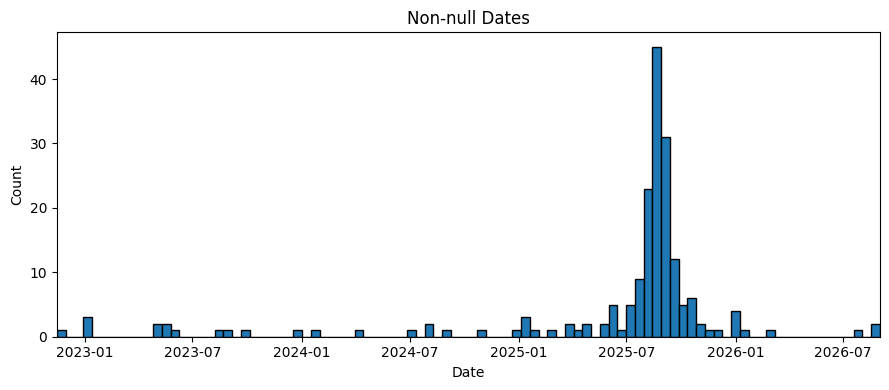

In [158]:

df= merged["parsed_dates"].explode()
df= pd.to_datetime(df, format="%Y-%m-%d", errors="coerce").dropna()

lo = df.quantile(0.10)   
hi = df.quantile(0.99)   
df_clip = df[(df >= lo) & (df <= hi)]

fig, ax = plt.subplots(figsize=(9, 4))
ax.hist(s_clip, bins="auto", edgecolor="black")
ax.set_title("Non-null Dates")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_xlim(df_clip.min(), df_clip.max())
ax.margins(x=0)

plt.tight_layout()
plt.show()


22. Write a regex to get all the urls in your description and print out the 5 most common urls

Start by searching for https..  Include a capturing group to only extract the name of the website.

- Look for both urls like https://www.google.com and without the www. like https://google.com
- The name of the website extracted should end in one of the common domains like .com, .org, .gov, so your regular expression should be sure to exclude any additional path information

In [159]:



rx_site = re.compile(
    r'https?://(?:www\.)?(?P<site>[a-z0-9-]+(?:\.[a-z0-9-]+)*\.(?:com|org|net|gov|edu|io|co|us|uk|ca|de|ai|info))(?=[/?#]|$)',
    re.IGNORECASE
)

sites = merged["job_description"].astype(str).str.findall(rx_site).explode().dropna()

top5 = Counter(sites).most_common(5)

print(f'The 5 most common urls are: {top5}')


The 5 most common urls are: [('dol.gov', 12), ('linkedin.com', 11), ('capgemini.com', 9), ('okta.com', 6), ('facebook.com', 6)]


23. Get Low and High Salary Range from the salary field.  Ignore hourly wages.  For those without a range (without the word to) use the single value as both the high and low range.  Print out the mean high and low salary ranges

In [160]:

salary_series = merged["salary"].astype(str)

rx_salary = re.compile(r"\$?([\d,]+)")

def parse_salary(s):
    s = s.lower()
    if "hour" in s: 
        return None, None
    
    nums = [int(x.replace(",", "")) for x in rx_salary.findall(s)]
    
    if "to" in s and len(nums) >= 2:  
        return nums[0], nums[1]
    elif nums:                       
        return nums[0], nums[0]
    else:
        return None, None

merged[["low_salary", "high_salary"]] = salary_series.apply(parse_salary).apply(pd.Series)


mean_low = merged["low_salary"].mean()
mean_high = merged["high_salary"].mean()




In [161]:

print(f"Mean low salary: {mean_low:,.2f}")
print(f"Mean high salary: {mean_high:,.2f}")

Mean low salary: 114,228.15
Mean high salary: 154,903.61


24. Are there any weird salaries?  Too high or too low?

In [166]:

low_thresh = 20000
high_thresh = 500000

weird_low = merged[merged["low_salary"].notna() & (merged["low_salary"] < low_thresh)]

weird_high = merged[merged["high_salary"].notna() & (merged["high_salary"] > high_thresh)]

print("=== Weird Low Salaries (< $20k) ===")
print(weird_low[["job_description", "salary", "low_salary", "high_salary"]].head(10))
print()

print("=== Weird High Salaries (> $500k) ===")
print(weird_high[["job_description", "salary", "low_salary", "high_salary"]].head(10))


=== Weird Low Salaries (< $20k) ===
                                        job_description  \
24    <div><p>Would you like to influence water mana...   
25    <div><p>Are you passionate about public servic...   
33    <div><p>This is a 24-month limited term positi...   
428   <p><strong>Salary Range: $9,852.82 - $13,278.1...   
1231  <h3>Job Description</h3><div><div>SCDMV Inform...   
1439  <div><p>Feast &amp; Fettle is seeking an<stron...   
1453  <h3>Job Description</h3><div><strong>Location:...   
1501  <div><p>At HopSkipDrive, our goal is to create...   
1858  <div><p>ARCH-Minneapolis is looking for motiva...   
2034  <div><b>About Centific</b><br><br>At Centific,...   

                         salary  low_salary  high_salary  
24    $7,556 to $10,221 Monthly      7556.0      10221.0  
25     $8,715 to $9,899 Monthly      8715.0       9899.0  
33     $4,469 to $6,922 Monthly      4469.0       6922.0  
428   $9,853 to $13,278 Monthly      9853.0      13278.0  
1231         $78 to

In [93]:
print('From the above inspections there are wierd low salary of $78–$85 Monthly and wierd high salary of $555,000')

From the above inspections there are wierd low salary of $78–$85 Monthly and wierd high salary of $555,000


23. Display a histogram of the high salary range (filter out values less than $1,000,000)

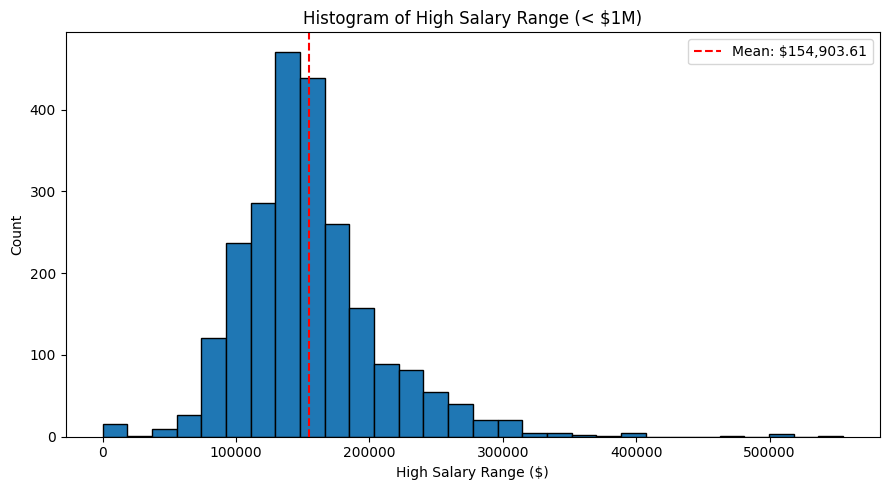

In [ ]:

high_salaries = merged["high_salary"].dropna()
high_salaries = high_salaries[high_salaries < 1_000_000]

plt.figure(figsize=(9,5))
plt.hist(high_salaries, bins=30, edgecolor="black")
plt.axvline(high_salaries.mean(), color="red", linestyle="--", label=f"Mean: ${high_salaries.mean():,.2f}")
plt.xlabel("High Salary Range ($)")
plt.ylabel("Count")
plt.title("Histogram of High Salary Range (< $1M)")
plt.legend()
plt.tight_layout()
plt.show()


24. Display a histogram of the low salary range (filter out values less than $1,000,000)

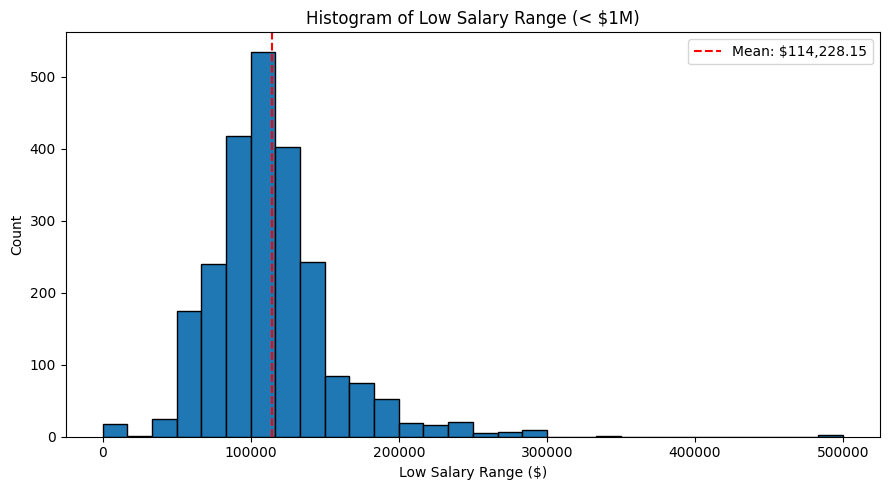

In [101]:

low_salaries = merged["low_salary"].dropna()
low_salaries = low_salaries[low_salaries < 1_000_000]

plt.figure(figsize=(9,5))
plt.hist(low_salaries, bins=30, edgecolor="black")
plt.axvline(low_salaries.mean(), color="red", linestyle="--", label=f"Mean: ${low_salaries.mean():,.2f}")
plt.xlabel("Low Salary Range ($)")
plt.ylabel("Count")
plt.title("Histogram of Low Salary Range (< $1M)")
plt.legend()
plt.tight_layout()
plt.show()
